In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [129]:
# Read the datasets into DataFrames
df1 = pd.read_excel('C:/Users/arali/Downloads/l/dataCustomerSegmentation.xlsx')
df2 = pd.read_excel('C:/Users/arali/Downloads/l/facturesMat.xlsx')

# Perform the join based on different customer ID columns
merged_df = df1.merge(df2, left_on='CUSTNO', right_on='IdPropr', how='inner')

# Save the merged DataFrame to an Excel file
merged_df.to_excel('merged_dataset.xlsx', index=False)

In [130]:
merged_df

,Unnamed: 0,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,FAX,EMAIL,...,GpMrq_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,TypeFinanc,Qte,PRIXTTC,TypePaiement,TypeFinancement,Couleur
0,655,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
1,655,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
2,655,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,...,NaN,MITSUBISHI,L200,COMPTANT,COMPTANT,1,294999.996,COMPTANT,COMPTANT,"White pearl ""W54"""
3,656,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,NaN,NaN,...,NaN,FORD,FIESTA,WAFASALAF,Crédit Classique,1,164000.004,Crédit,Crédit Classique,CHROME COPPER
4,673,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,NaN,NaN,...,NaN,OPEL,CROSSLAND X,NaN,COMPTANT,1,229000.008,COMPTANT,COMPTANT,Blanc glacier GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,350996,32005024,Tucker,Eric,70000,LAAYOUNE,Maroc,+1-952-331-7118x34278,NaN,NaN,...,NaN,DFSK,K01,SOFAC,Crédit Classique,1,89000.004,Crédit,Crédit Classique,NaN
120391,351215,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,190700.000,Crédit,Crédit Classique,Titanium Gray
120392,351215,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,...,NaN,MITSUBISHI FUSO,FK,CONVENTION,Crédit Classique,1,495000.000,Crédit,Crédit Classique,Z2835 - Blanc Mitsubishi
120393,351215,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,204000.000,Crédit,Crédit Classique,Titanium Gray


In [131]:
#remove Unnamed column
merged_df.drop('Unnamed: 0',axis=1,inplace=True)

In [132]:
merged_df

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,FAX,EMAIL,DATECRE,...,GpMrq_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,TypeFinanc,Qte,PRIXTTC,TypePaiement,TypeFinancement,Couleur
0,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
1,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
2,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,MITSUBISHI,L200,COMPTANT,COMPTANT,1,294999.996,COMPTANT,COMPTANT,"White pearl ""W54"""
3,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,FORD,FIESTA,WAFASALAF,Crédit Classique,1,164000.004,Crédit,Crédit Classique,CHROME COPPER
4,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,OPEL,CROSSLAND X,NaN,COMPTANT,1,229000.008,COMPTANT,COMPTANT,Blanc glacier GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,Tucker,Eric,70000,LAAYOUNE,Maroc,+1-952-331-7118x34278,NaN,NaN,2012-08-29 00:00:00.000,...,NaN,DFSK,K01,SOFAC,Crédit Classique,1,89000.004,Crédit,Crédit Classique,NaN
120391,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,2012-08-31 00:00:00.000,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,190700.000,Crédit,Crédit Classique,Titanium Gray
120392,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,2012-08-31 00:00:00.000,...,NaN,MITSUBISHI FUSO,FK,CONVENTION,Crédit Classique,1,495000.000,Crédit,Crédit Classique,Z2835 - Blanc Mitsubishi
120393,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,2012-08-31 00:00:00.000,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,204000.000,Crédit,Crédit Classique,Titanium Gray


# RFM ANALYSIS

In [133]:
columns_to_keep = ['CUSTNO','IDFactMat','DateFact', 'PRIXTTC']

subset_df = merged_df[columns_to_keep].copy()
subset_df

,CUSTNO,IDFactMat,DateFact,PRIXTTC
0,31000822,5726,2018-02-23,340000.008
1,31000822,5727,2018-02-23,340000.008
2,31000822,14344,2018-04-27,294999.996
3,40000455,39533,2018-11-23,164000.004
4,12015740,106877,2020-02-28,229000.008
...,...,...,...,...
120390,32005024,24091,2018-07-11,89000.004
120391,26000776,7528,2018-03-09,190700.000
120392,26000776,7533,2018-03-09,495000.000
120393,26000776,7557,2018-03-09,204000.000


In [134]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120395 entries, 0 to 120394
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   CUSTNO     120395 non-null  int64         
 1   IDFactMat  120395 non-null  int64         
 2   DateFact   120395 non-null  datetime64[ns]
 3   PRIXTTC    120395 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.6 MB


In [135]:
subset_df['DateFact'] = pd.to_datetime(subset_df['DateFact'])

In [136]:
subset_df['DateFact'] = pd.to_datetime(subset_df['DateFact'], errors='coerce')
print(subset_df['DateFact'].dtype)

datetime64[ns]


In [137]:
# Count the number of missing (invalid) date values
print(subset_df['DateFact'].isna().sum())  
# Display rows with invalid date values
print(subset_df[subset_df['DateFact'].isna()]) 

0
Empty DataFrame
Columns: [CUSTNO, IDFactMat, DateFact, PRIXTTC]
Index: []


In [138]:
subset_df['IDFactMat'].isnull().sum()

0

In [139]:
# Maximum Transaction Date or the latest transaction date.

max_transaction_date = max(subset_df['DateFact']).date()
max_transaction_date

datetime.date(2023, 4, 12)

In [140]:
from datetime import datetime
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_transaction_date), "%Y-%m-%d")

In [141]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = subset_df.groupby(['CUSTNO']).agg({'DateFact': lambda date : (comparison_date - date.max()).days,
                                                            'IDFactMat' : lambda fact_id : len(fact_id), 
                                                            'PRIXTTC' : lambda p : sum(p)})

In [142]:

rfm_table

,DateFact,IDFactMat,PRIXTTC
CUSTNO,,,
1000016,1514,1,4.168950e+05
1000036,1363,1,1.900000e+05
1000081,1444,25,9.727375e+06
1000265,0,919,3.092222e+08
1000327,1505,1,2.836950e+05
...,...,...,...
89000137,21,1,2.548000e+05
89000138,21,1,1.629450e+05
89000144,16,1,1.836730e+05


In [143]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'DateFact' : 'Recency', 
                        'IDFactMat' : 'Frequency',
                        'PRIXTTC' : 'Monetary'} , inplace=True)
rfm_table

,Recency,Frequency,Monetary
CUSTNO,,,
1000016,1514,1,4.168950e+05
1000036,1363,1,1.900000e+05
1000081,1444,25,9.727375e+06
1000265,0,919,3.092222e+08
1000327,1505,1,2.836950e+05
...,...,...,...
89000137,21,1,2.548000e+05
89000138,21,1,1.629450e+05
89000144,16,1,1.836730e+05


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(rfm_table[['Recency', 'Frequency', 'Monetary']])


In [146]:
data_normalized

array([[7.86085151e-01, 0.00000000e+00, 1.01655495e-04],
       [7.07684320e-01, 0.00000000e+00, 4.63295164e-05],
       [7.49740395e-01, 1.25891733e-03, 2.37191888e-03],
       ...,
       [8.30737279e-03, 0.00000000e+00, 4.47867434e-05],
       [6.23052960e-03, 0.00000000e+00, 5.79484736e-05],
       [3.63447560e-03, 0.00000000e+00, 4.62417341e-05]])

In [147]:
recency_weight = 2
frequency_weight = 3
monetary_weight = 1

rfm_table['overall_score'] = (
    recency_weight * data_normalized[:, 0] +
    frequency_weight * data_normalized[:, 1] +
    monetary_weight * data_normalized[:, 2]
)


In [164]:
rfm_table

,Recency,Frequency,Monetary,overall_score
CUSTNO,,,,
1000016,1514,1,4.168950e+05,1.572272
1000036,1363,1,1.900000e+05,1.415415
1000081,1444,25,9.727375e+06,1.505629
1000265,0,919,3.092222e+08,0.219861
1000327,1505,1,2.836950e+05,1.562894
...,...,...,...,...
89000137,21,1,2.548000e+05,0.021869
89000138,21,1,1.629450e+05,0.021847
89000144,16,1,1.836730e+05,0.016660


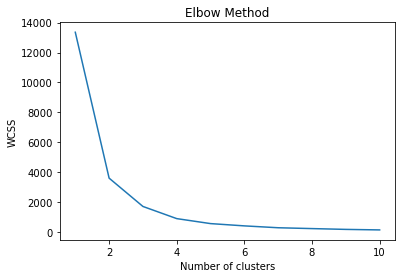

In [165]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
overall_score = rfm_table['overall_score']  # Assuming 'overall_score' is the column name
for i in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(overall_score.values.reshape(-1, 1))  # Reshape and use only the 'overall_score' column
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [166]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your scaled data and overall_score column
overall_score = rfm_table['overall_score'].values.reshape(-1, 1)  # Reshape for K-Means input

# Calculate silhouette scores for 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels_3 = kmeans_3.fit_predict(overall_score)
silhouette_score_3 = silhouette_score(overall_score, labels_3)

# Calculate silhouette scores for 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels_4 = kmeans_4.fit_predict(overall_score)
silhouette_score_4 = silhouette_score(overall_score, labels_4)

# Print the silhouette scores
print(f"Silhouette Score for 3 clusters: {silhouette_score_3}")
print(f"Silhouette Score for 4 clusters: {silhouette_score_4}")


Silhouette Score for 3 clusters: 0.5695996890267004
Silhouette Score for 4 clusters: 0.5883664374624495


In [167]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have your 'rfm_table' and 'overall_score' as previously defined

# Perform K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(overall_score)

# Map cluster labels to label names
cluster_labels_mapping = {
    0: "Platinum",
    1: "Gold",
    2: "Silver",
    3: "Bronze"
}
cluster_labels_names = [cluster_labels_mapping[label] for label in cluster_labels]

# Add cluster labels and names to the original DataFrame
rfm_table['cluster'] = cluster_labels
rfm_table['cluster_label'] = cluster_labels_names


In [168]:
rfm_table

,Recency,Frequency,Monetary,overall_score,cluster,cluster_label
CUSTNO,,,,,,
1000016,1514,1,4.168950e+05,1.572272,1,Gold
1000036,1363,1,1.900000e+05,1.415415,3,Bronze
1000081,1444,25,9.727375e+06,1.505629,3,Bronze
1000265,0,919,3.092222e+08,0.219861,2,Silver
1000327,1505,1,2.836950e+05,1.562894,1,Gold
...,...,...,...,...,...,...
89000137,21,1,2.548000e+05,0.021869,2,Silver
89000138,21,1,1.629450e+05,0.021847,2,Silver
89000144,16,1,1.836730e+05,0.016660,2,Silver


In [171]:
rfm_table['cluster_label'].value_counts()

Platinum    14729
Silver      10797
Bronze       9958
Gold         9160
Name: cluster_label, dtype: int64

In [172]:
cust_title_percentage = (rfm_table['cluster_label'].value_counts() / len(rfm_table)) * 100
cust_title_percentage

Platinum    32.992115
Silver      24.184661
Bronze      22.305349
Gold        20.517875
Name: cluster_label, dtype: float64

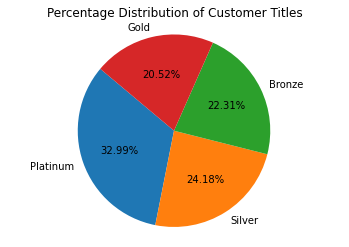

In [173]:
plt.pie(cust_title_percentage, labels=cust_title_percentage.index, autopct='%.2f%%', startangle=140)
plt.axis('equal')  
plt.title('Percentage Distribution of Customer Titles')
plt.show()